<a href="https://colab.research.google.com/github/malakbayramovaa/NumPy-tutorials/blob/main/numpy_izahlar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy Basics

NumPy (Numerical Python sözlərinin qısaltması) — Python-da ədədi hesablamalar üçün ən vacib fundamental paketlərdən biridir. Elmi funksionallıq təmin edən əksər hesablama paketləri məlumat mübadiləsi üçün NumPy array obyektlərindən istifadə edir və onları standart olaraq qəbul edir.

NumPy aşağıdakı imkanları təmin edir:

ndarray — sürətli, çoxölçülü massiv (array) tipi; yüksək performanslı array yönümlü riyazi əməliyyatlar və çevik broadcasting imkanları təklif edir.

Dövrlər (loops) yazmadan, bütöv massivlər üzərində sürətli əməliyyatlar aparan riyazi funksiyalar.

Massiv məlumatlarını diskə oxuma/yazma və memory-mapped files ilə işləmək üçün alətlər.

Xətti cəbr (linear algebra), təsadüfi ədədlər generasiyası (random number generation) və Fourier transform imkanları.

C, C++ və FORTRAN kitabxanaları ilə əlaqə yaratmaq üçün C API.

NumPy-nin asan istifadə olunan C API olduğuna görə, aşağı səviyyəli dillərdə yazılmış xarici kitabxanalara məlumat ötürmək və həmin kitabxanalardan məlumatı yenidən NumPy array kimi geri almaq çox rahatdır. Buna görə Python köhnə C/C++/Fortran kod bazalarını “wrap” etmək üçün əvəzolunmaz dilə çevrilib.

NumPy özü model qurmaq və ya elmi funksionallıq təqdim etmir, amma NumPy arrays və array-oriented computing fəlsəfəsini başa düşmək, xüsusilə də pandas kimi array yönümlü kitabxanalardan effektiv istifadə etməyə kömək edir.

**Data analysis üçün NumPy-də əsas istifadə sahələri:**

* Data təmizlənməsi, altsetlər, filtrasiya, transformasiya və digər hesablamalar üçün sürətli vektorizə olunmuş əməliyyatlar.

* Sorting, unique, set operations kimi ümumi massiv alqoritmləri.

* Təsviri statistika və məlumatların effektiv şəkildə toplanması və xülasələnməsi.

* Data alignment və heterogen dataset-lərin merge/join edilməsi.

* Dövrlər əvəzinə if-elif-else şaxələri olmadan array expression şəklində şərti məntiqin ifadə olunması.

* Group-wise əməliyyatlar (aggregation, transformation, function application).

NumPy ümumi ədədi məlumat emalı üçün əsas təməl yaratsa da, statistik analiz və analitika üçün — xüsusilə də cədvəl tipli məlumatlarda — istifadəçilər çox vaxt pandas-a üstünlük verirlər. pandas həm də zaman sırası (time series) kimi NumPy-də olmayan funksionallıqlar təmin edir.

Array yönümlü hesablama Python-da 1995-ci ilə gedib çıxır — o zaman Jim Hugunin Numeric kitabxanasını yaratdı. Sonrakı 10 ildə çoxlu elmi proqramlaşdırma icmaları Python-da array proqramlaşdırmasına keçsə də, ekosistem parçalanmışdı. 2005-ci ildə Travis Oliphant Numeric və Numarray layihələrini birləşdirərək NumPy layihəsini yaratdı və icmanı vahid framework ətrafında topladı.

**NumPy-nin böyük array-lar üzərində effektiv olmasının səbəbləri:**

* NumPy məlumatı contiguous memory block şəklində saxlayır; Python-un daxili obyektlərindən asılı deyil. C-də yazılmış NumPy alqoritmləri bu yaddaş üzərində heç bir type-checking olmadan işləyə bilir. Bu həm yaddaşa qənaət edir, həm də çox sürətlidir.

* NumPy əməliyyatları dövr (for loop) yazmadan bütöv array üzərində mürəkkəb hesablama aparır.

Bir milyon ədəddən ibarət NumPy array-i və onun Python list ekvivalentini nəzərdən keçirək:

In [31]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))


# The NumPy ndarray: A Multidimensional Array Object

NumPy-ın əsas xüsusiyyətlərindən biri onun N-dimensional array obyekti olan ndarray-dır. ndarray Python-da böyük dataset-lərlə işləmək üçün sürətli və çevik konteynerdir. Array-lər sayəsində sən skalyar əməliyyatlara bənzər sintaksis ilə böyük data blokları üzərində riyazi əməliyyatları icra edə bilirsən.

NumPy-nin batch hesablamaları necə asanlaşdırdığını göstərmək üçün əvvəlcə NumPy-i import edək və kiçik random data array-i yaradaq:

In [32]:
import numpy as np

data = np.random.randn(2, 3)
data


array([[-0.65883641,  1.09130257,  2.0342496 ],
       [-0.7188033 , -1.25497468,  1.20183792]])

İndi isə data üzərində riyazi əməliyyatlar edək:

In [33]:
data * 10

array([[ -6.5883641 ,  10.91302571,  20.34249596],
       [ -7.18803302, -12.54974676,  12.01837924]])

In [34]:
data + data

array([[-1.31767282,  2.18260514,  4.06849919],
       [-1.4376066 , -2.50994935,  2.40367585]])

Birinci nümunədə bütün elementlər 10 ilə vurulub.
İkinci nümunədə isə array-dakı hər element öz qarşılığı ilə toplanıb.

**NumPy import qaydası**

In [35]:
import numpy as np


from numpy import * istifadə etmək tövsiyə olunmur, çünki numpy namespace-i çox böyükdür və min, max kimi built-in Python funksiyaları ilə toqquşan adlar var.

**ndarray: Homogeneous Data**

ndarray homogen datadır — bütün elementlər eyni tipdə olmalıdır.

Hər bir array-in:

* shape — ölçüləri göstərən tuple

* dtype — data type haqqında metadata

məlumatları var:

In [36]:
data.shape   # (2, 3)
data.dtype   # dtype('float64')


dtype('float64')

**ndarray yaratmaq**

Ən sadə yol np.array funksiyasıdır. Bu funksiya hər hansı sequence-ləri (list, tuple və s.) array-ə çevirir.

In [37]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1


array([6. , 7.5, 8. , 0. , 1. ])

**Nested sequence → multidimensional array**

In [38]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2


array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

**Array ölçüləri:**

In [39]:
print(arr2.ndim)    # 2
print(arr2.shape)   # (2, 4)


2
(2, 4)


**Data tipi:**

In [40]:
arr1.dtype

dtype('float64')

In [41]:
arr2.dtype

dtype('int64')

**Digər array yaratma funksiyaları**

NumPy yeni array yaratmaq üçün bir çox funksiya təklif edir:

In [42]:
# np.zeros
np.zeros(10)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**np.ones**

Şəkilinə uyğun olaraq 1-lərlə dolu array yaradır.

In [43]:
np.empty((2, 3, 2))
# np.empty təsadüfi “zibil” (garbage) dəyərlər qaytara bilər, sıfırla doldurulmasına zəmanət yoxdur.

array([[[6.10044444e-316, 0.00000000e+000],
        [2.58883487e-312, 2.41907520e-312],
        [2.44029516e-312, 2.33419537e-312]],

       [[9.76118064e-313, 2.14321575e-312],
        [2.35541533e-312, 8.48798317e-313],
        [1.01855798e-312, 2.02566915e-322]]])

**np.arange**

range funksiyasının array versiyasıdır:

In [44]:
np.arange(15)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

**NumPy-ni sürətli edən nədir?**

NumPy böyük data üzərində yüksək performanslıdır, çünki:

* Data contiguous memory block içində saxlanır.

* C ilə yazılmış funksiyalar əlavə yoxlamalar olmadan birbaşa bu yaddaş üzərində işləyir.

* Python loop-larına ehtiyac yoxdur — əməliyyatlar bütün array üzərində vektorlaşdırılmış şəkildə aparılır.

* Daha az yaddaş istifadə edir.

Performance fərqi nümunəsi

In [45]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))


In [46]:
# NumPy list
%time for _ in range(10): my_arr2 = my_arr * 2
# ~70 ms


CPU times: user 11.2 ms, sys: 62 µs, total: 11.3 ms
Wall time: 10.7 ms


In [47]:
# Python list
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]
# ~1.05 s


CPU times: user 372 ms, sys: 82.5 ms, total: 455 ms
Wall time: 456 ms


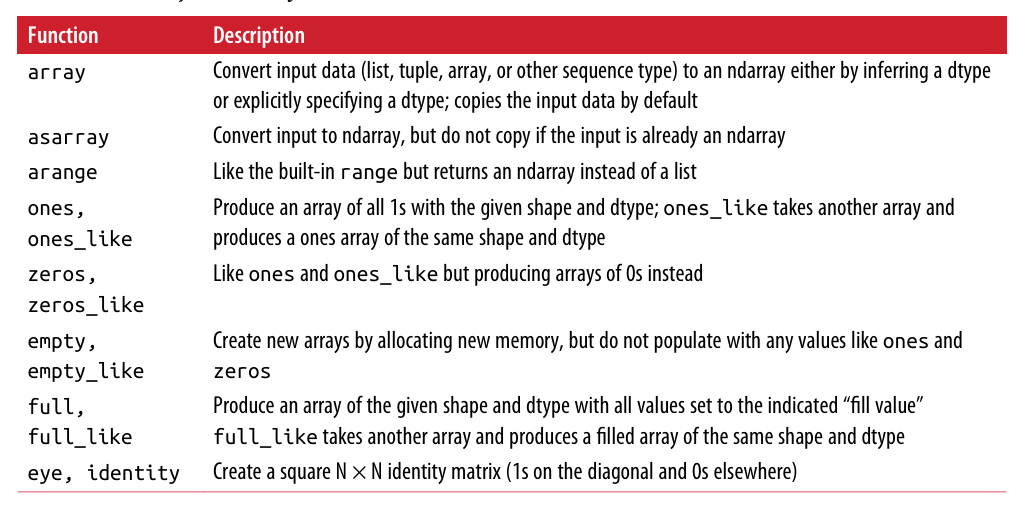

# Data Types for ndarrays

**dtype** — NumPy-də xüsusi bir obyekt olub ndarray-in yaddaşda saxlanılan məlumatları düzgün şəkildə şərh etməsi üçün lazım olan informasiyanı (metadata) saxlayır.

In [48]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)


In [49]:
print(arr1.dtype)   # dtype('float64')
print(arr2.dtype)   # dtype('int32')


float64
int32


**NumPy dtype-lar niyə vacibdir?**

dtype-lar NumPy-nin digər sistemlərdən gələn data ilə işləməkdə çevik olmasının əsas səbəblərindən biridir.

Çünki:

* dtype-lar birbaşa yaddaşdakı və ya diskdəki binary data representation ilə uyğun gəlir.

* Bu isə böyük binary dataları diskə yazmağı və oxumağı çox asanlaşdırır.

* Eyni zamanda C və Fortran kimi aşağı səviyyəli dillərlə inteqrasiya etməyə imkan yaradır.

NumPy dtype adlandırılması

NumPy-də ədədi data type-lar aşağıdakı kimi adlandırılır:

type adı + element başına düşən bit sayı

Məsələn:

* float64 → 64-bit (8 byte) double precision floating point

* int32 → 32-bit integer

Python-da float tipi də əslində arxa planda 64-bit double precision kimi saxlanılır, buna görə də NumPy-də bunun adı float64-dır.

**Adətən yalnız aşağıdakıları bilməyin kifayətdir:**

* float

* int

* boolean

* complex

* string

* object (Python object)

Böyük dataset-lərlə işləyərkən, xüsusilə yaddaş və disk istifadəsinə nəzarət etmək lazım olanda — dtype seçimi vacib olur.

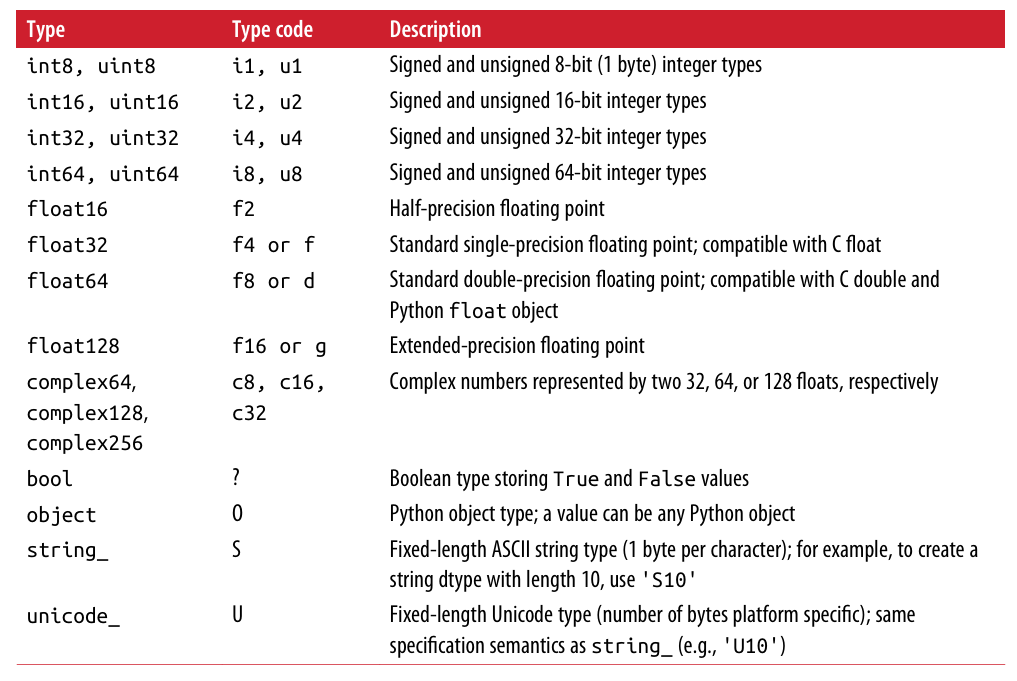

**Array-ları bir dtype-dan digər dtype-a çevirmək (astype metodu)**

Bir ndarray-i bir dtype-dan başqa dtype-a explicit şəkildə çevirmək üçün astype metodundan istifadə olunur:

In [50]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype         # dtype('int64')

float_arr = arr.astype(np.float64)
float_arr.dtype   # dtype('float64')

# Bu nümunədə int tipli elementlər float64 tipinə çevrilib.

dtype('float64')

Floating point → integer çevrilməsi

Əgər float tipli ədədləri int dtype-a çevirsən, ondalık hissə kəsilir (truncate olunur):

In [51]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)


array([ 3, -1, -2,  0, 12, 10], dtype=int32)

**String-lərin numeric dtype-a çevrilməsi**

Say göstərən string-lər numeric tipə asanlıqla çevrilə bilər:

In [52]:
numeric_bytes = np.array(['1.25', '-9.6', '42'], dtype=np.bytes_)
numeric_bytes.astype(float)


array([ 1.25, -9.6 , 42.  ])

**Diqqət:**
numpy.string_ fixed-size string saxlayır — bu o deməkdir ki, string-lər səssiz şəkildə truncation ola bilər.
Non-numeric datalar üçün pandas daha rahat davranır.

**Casting uğursuz olarsa**

Əgər çevrilə bilməyən string və ya uyğun olmayan data varsa, ValueError yaranacaq.

Burada float yazmağım np.float64 ilə eyni işləyir — NumPy Python type-larını öz dtype-larına alias edir.

**Başqa bir array-in dtype-ı ilə çevirmək**

astype metoduna birbaşa başqa array-in dtype-ını vermək də olur:

In [53]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

int_array.astype(calibers.dtype)


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

**dtype üçün shorthand type code-lar**

NumPy müəyyən qısa type kodları da dəstəkləyir:

In [54]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32


array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

**Vacib qeyd**

⭐ astype həmişə yeni array (copy) yaradır.
Hətta yeni dtype köhnə dtype ilə tam eyni olsa belə — yenə də copy yaradılır.

#  Arithmetic with NumPy Arrays

NumPy Arrays ilə arifmetik əməliyyatlar etmək çox önəmlidir, çünki bu, for loop yazmadan böyük həcmli məlumatlar üzərində batch operations icra etməyə imkan verir. NumPy istifadəçiləri buna **vectorization** deyirlər.

Eyni ölçülü array-lər arasında istənilən arifmetik əməliyyat element-wise tətbiq olunur:

In [55]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr * arr
arr - arr


array([[0., 0., 0.],
       [0., 0., 0.]])

**Scalar ilə əməliyyatlar**

Bir array-ı scalar-a böləndə və ya digər əməliyyatlarda, scalar bütün elementlərə tətbiq olunur:

In [56]:
1 / arr
arr ** 0.5


array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

**Array Comparison**

Eyni ölçülü array-lər arasında müqayisə aparanda nəticə boolean array olur:

In [57]:
arr2 > arr


array([[False, False, False],
       [False, False, False]])

# Basic Indexing and Slicing

NumPy array indexing çox zəngin bir mövzudur. Bir çox üsulla subset seçmək mümkündür.

**1D arrays (birölçülü array-lər)**

Python list-lərinə bənzəyir:

In [58]:
arr = np.arange(10)
arr[5]
arr[5:8]
arr[5:8] = 12


NumPy slices copy yaratmır — view yaradır.

Yəni slice üzərində edilən dəyişikliklər əsas array-a təsir edir.

Misal:

In [59]:
arr_slice = arr[5:8]
arr_slice[1] = 12345


Bu dəyişiklik arr-də də görünəcək.

Əgər copy lazımdırsa:

In [60]:
arr[5:8].copy()

array([   12, 12345,    12])

**2D arrays (ikiölçülü array-lər)**

İkiölçülü array-lərdə hər index bir row-a (1D array) uyğundur:

In [61]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]         # 3-cü sətir


array([7, 8, 9])

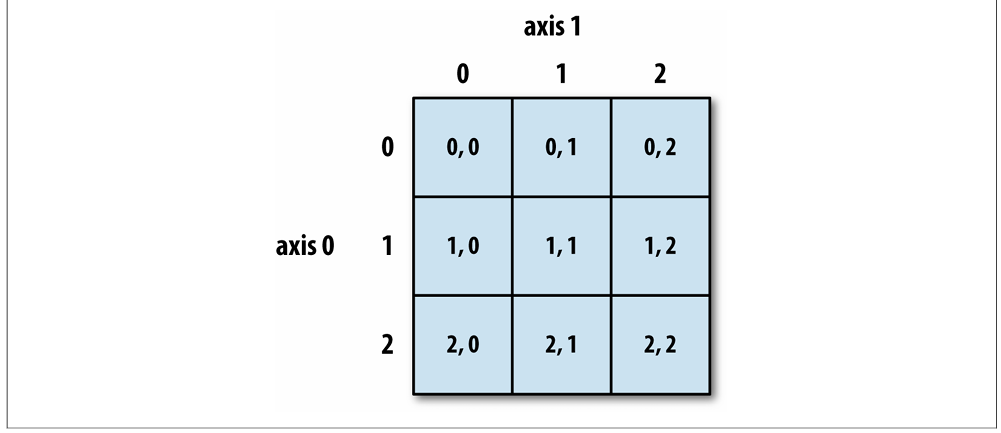

Multidimensional array-lərdə (çoxölçülü array-lərdə) əgər son indeksləri yazmasan, geri qaytarılan obyekt daha aşağı ölçülü ndarray olur və həmin obyekt yuxarı ölçülü oxlar boyunca bütün məlumatları əhatə edir.

Məsələn, 2 × 2 × 3 ölçülü arr3d array-ı:

In [62]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]],
                  [[7, 8, 9], [10, 11, 12]]])


In [63]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

**Scalar və array assign etmək**

arr3d[0] hissəsinə həm scalar, həm də array yazmaq mümkündür:

In [64]:
old_values = arr3d[0].copy()
arr3d[0] = 42


Bu halda həmin hissədəki bütün elementlər 42 olur.

Sonra yenidən köhnə qiymətləri qaytarmaq mümkündür:

In [65]:
arr3d[0]=old_values


**Bir neçə indekslə element seçimi**

arr3d[1, 0] — indeksləri (1, 0) ilə başlayan elementlərin hamısını götürür və nəticə 1D array olur:

In [66]:
arr3d[1,0]

array([7, 8, 9])

# Indexing with slices

Python list-lərində olduğu kimi, ndarray obyektləri də slicing dəstəkləyir:

In [67]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

**2D arrays ilə slicing**

Əvvəlki arr2d array-ını nəzərdən keçirək:

In [68]:
arr2d = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

Bir neçə slice birlikdə istifadə edilə bilər

In [69]:
arr2d[:2, 1:]


array([[2, 3],
       [5, 6]])

Bu, belə oxunur:

ilk iki sətir (:2)

hər sətirin 1-ci indeksdən sonrakı sütunları (1:)

**Integer index + slice birlikdə**

In [70]:
print(arr2d[1, :2])   # ikinci sətirin ilk iki elementi
print(arr2d[:2, 2])   # üçüncü sütunun ilk iki elementi


[4 5]
[3 6]


**Colon : bütün oxu seçmək deməkdir**

Aşağıdakı misalda bütün sətirlər, amma yalnız ilk sütun seçilir:

In [71]:
arr2d[:, :1]


array([[1],
       [4],
       [7]])

**Slice-a assign etmək**

Slice-a dəyər yazanda həmin hissənin bütün elementləri dəyişir:

In [73]:
arr2d[:2, 1:] = 0


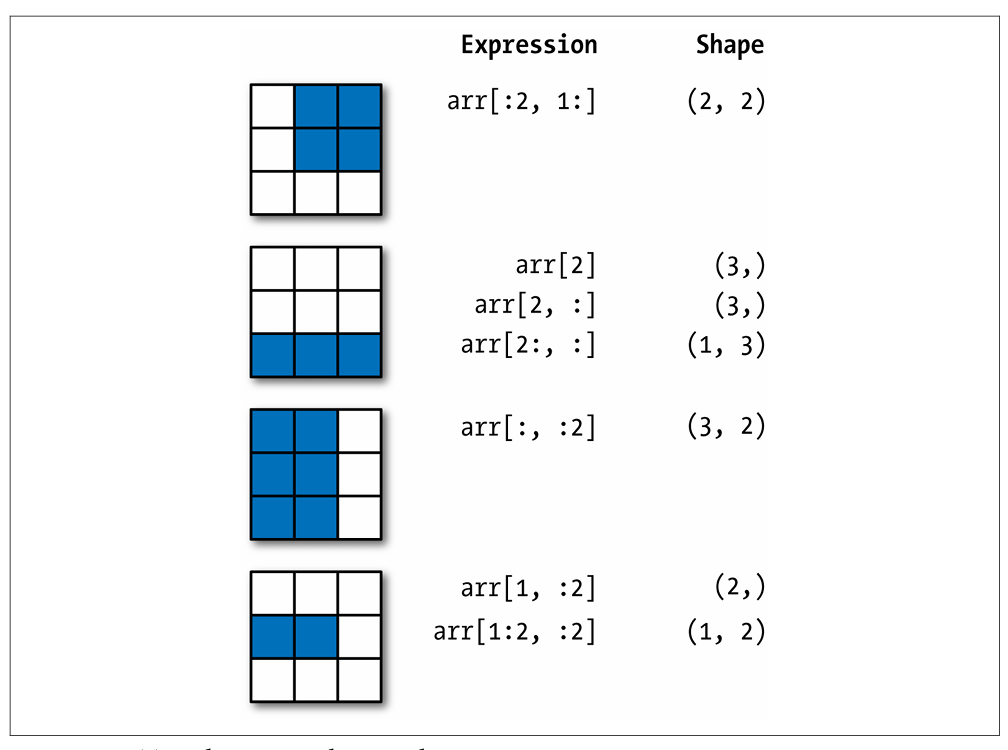

# Boolean Indexing

**Boolean Indexing** — massivlərdən (arrays) verilənləri filtrasiya etməyə imkan verən üsuldur. Bunun üçün boolean (True/False) dəyərlərdən istifadə edilir.

Aşağıdakı nümunədə həm data array, həm də təkrarlanan adlardan ibarət names array var:

In [74]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)


Hər name massivdəki bir sətirə uyğun gəlir. Biz yalnız 'Bob' olan sətirləri seçmək istəsək, adi müqayisə əməliyyatı istifadə edirik:

In [75]:
names == 'Bob'


array([ True, False, False,  True, False, False, False])

Bu boolean array-i indexing zamanı data massivinə tətbiq edirik:

In [76]:
data[names == 'Bob']


array([[-0.75138782,  0.89396594,  0.12877157, -0.43147615],
       [ 0.79677998, -0.85184605, -0.23323129, -0.64010369]])

Boolean array hansı ox üzrə indexləmə edirsinizsə, həmin oxun uzunluğu ilə eyni olmalıdır.

Kolonları da eyni anda seçmək mümkündür:

In [77]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]


array([-0.43147615, -0.64010369])

Şərti tərsinə çevirmək — **~ operatoru**

'Bob' olmayan sətirləri seçmək üçün iki yol var:

In [78]:
names != 'Bob'


array([False,  True,  True, False,  True,  True,  True])

In [79]:
~(names == 'Bob')


array([False,  True,  True, False,  True,  True,  True])

Birdən çox şərti birləşdirmək — **& (and), | (or)**

In [80]:
mask = (names == 'Bob') | (names == 'Will')
data[mask]


array([[-0.75138782,  0.89396594,  0.12877157, -0.43147615],
       [ 0.41446654, -0.64451832,  1.1691296 ,  0.73648204],
       [ 0.79677998, -0.85184605, -0.23323129, -0.64010369],
       [ 2.53464329,  0.52279007,  0.20755179,  1.83567628]])

**Qeyd:**

Python-un and və or sözləri boolean array-lərlə işləmir. Onların yerinə & və | istifadə edilməlidir.

**Boolean indexing ilə massivdə dəyərləri dəyişmək**

Bütün mənfi dəyərləri 0 etmək:

In [81]:
data[data < 0] = 0


In [82]:
# setirleri deyismek
data[names != 'Joe'] = 7


# Fancy Indexing

**Fancy indexing** — massivləri integer array-lərlə indexləməkdir.

Nümunə:

In [83]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i


In [84]:
# İstənilən sıra ilə sətirləri seçmək olar:
arr[[4, 3, 0, 6]]


array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [85]:
# Negativ indekslə də:
arr[[-3, -5, -7]]


array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

**İki integer array ilə fancy indexing**

In [86]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]


array([1., 5., 7., 2.])

Bu zaman tuple kimi (row, col) elementləri seçilir:

(1,0)

(5,3)

(7,1)

(2,2)

Nəticə həmişə 1-dimensional array olur.

**Rectangular region seçmək**

Əgər həm sətirləri, həm də kolonları ayrıca seçmək istəyirsinizsə:

In [87]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]


array([[1., 1., 1., 1.],
       [5., 5., 5., 5.],
       [7., 7., 7., 7.],
       [2., 2., 2., 2.]])

**Fancy indexing həmişə copy yaradır**

Yəni slicing-dən fərqli olaraq data yeni massivə köçürülür.

# Transposing Arrays and Swapping Axes

**Transpose** — massivdə oxların yerini dəyişməkdir. Bu zaman copy yaranmır, yalnız görünüş dəyişir.

In [88]:
arr = np.arange(15).reshape((3, 5))
arr.T


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [89]:
# np.dot ilə matrix multiplication zamanı transpose tez-tez istifadə edilir
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)


array([[7.86152591, 2.31505852, 1.73747154],
       [2.31505852, 5.10494236, 0.05879874],
       [1.73747154, 0.05879874, 5.08339425]])

# Universal Functions: Fast Element-Wise Array Functions

**Universal function (ufunc)**— ndarray obyektləri üzərində element-wise əməliyyat aparan funksiyadır.
Bunları, scalar dəyərlər ilə işləyən və nəticə kimi yenə scalar qaytaran sadə funksiyaların vectorized və çox sürətli versiyası kimi düşünə bilərsən.

Bir çox ufunc sadə element-wise transformasiya edir, məsələn sqrt və ya exp:

In [90]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)


array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Bu tip funksiyalara unary ufuncs deyilir (yəni bir dəyərlə işləyən).

**Binary ufuncs (iki array üzərində işləyən funksiyalar)**

Bəzi ufunc-lar isə iki array qəbul edir, məsələn add və ya maximum.
Aşağıdakı nümunədə np.maximum(x, y) hər element üzrə böyük olanı seçir:

In [92]:
# np.maximum(x, y)


**Birdən çox nəticə qaytaran ufunc — modf**

Bəzi ufunc-lar iki array qaytara bilər.
modf funksiyası, Python divmod funksiyasının vectorized versiyasıdır və ondalik (fractional) və tam (integral) hissələri ayrı-ayrı array-lər kimi qaytarır:

In [93]:
remainder, whole_part = np.modf(arr)


**Ufunc-larda out= argumenti (in-place əməliyyat)**

Bütün ufunc-lar optional olaraq out argumentini qəbul edir.
Bu, əməliyyatı in-place, yəni mövcud array üzərində aparmağa imkan verir:

In [95]:
# np.sqrt(arr, arr)


* ufunc → ndarray üzərində sürətli element-wise əməliyyat.

* unary ufunc → sqrt, exp, abs və s.

* binary ufunc → add, maximum və s.

* modf → iki array qaytarır (fractional + whole).

* out= → nəticəni in-place massivə yazmağa imkan verir.

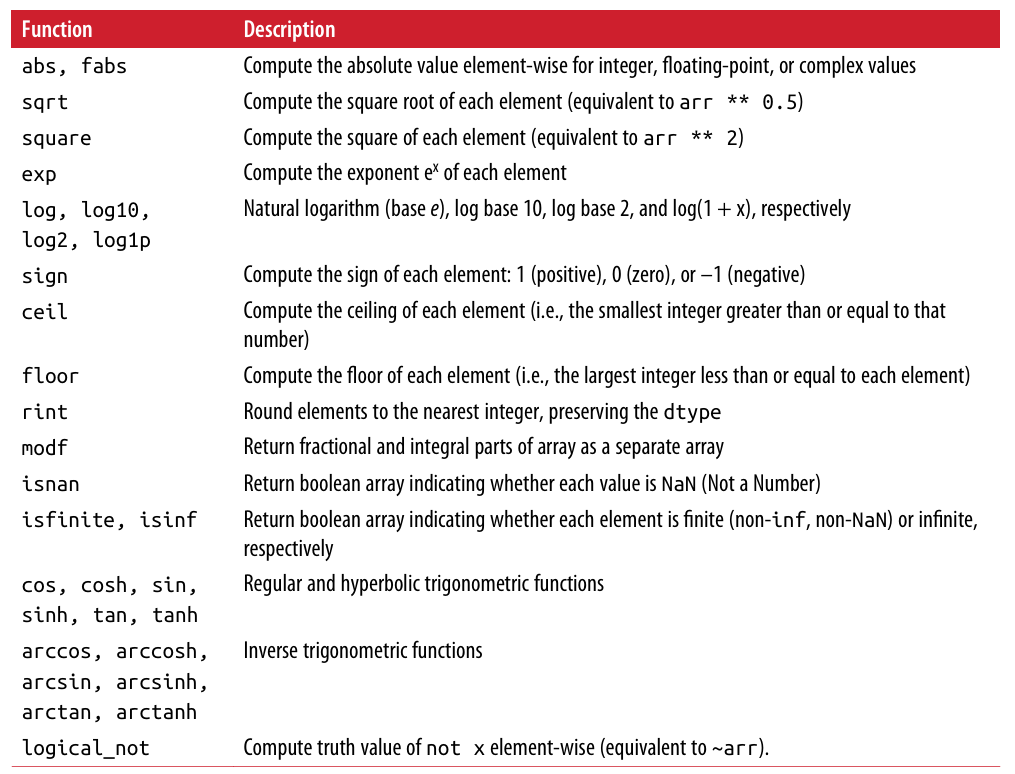

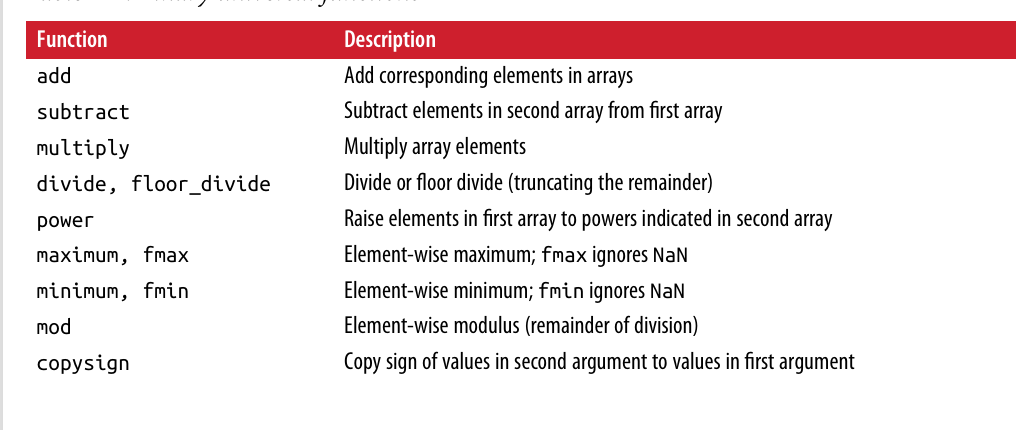

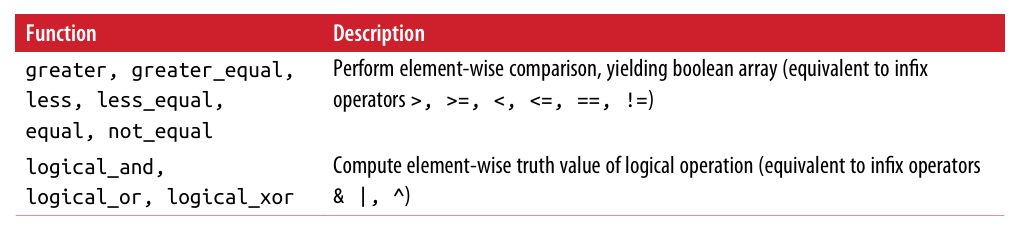

# Array-Oriented Programming with Arrays

NumPy array-larından istifadə etmək, çoxlu data processing tapşırıqlarını qısa və səliqəli array expressions ilə ifadə etməyə imkan verir.
Əks halda, bunları etmək üçün döngələr (loops) yazmaq lazım olardı.

Array ifadələri ilə döngələri əvəz etməyə **vectorization** deyilir.

Ümumiyyətlə:

vectorized operations → Python döngələrindən 1–2 (və ya daha çox) dəfə sürətlidir

xüsusilə numerical computations zamanı böyük fərq yaranır

Appendix A hissəsində isə broadcasting haqqında danışılır — bu da hesablamaları vectorize etməyin güclü üsuludur.

Nümunə: sqrt(x² + y²) funksiyasının grid üzrə hesablanması

Deyək ki, biz:

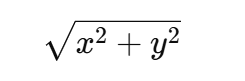


funksiyasını müəyyən grid üzərində hesablamaq istəyirik. np.meshgrid funksiyası iki 1D array-dan istifadə edərək: bütün (x, y) cütlükləri üçün iki 2D matrix yaradır.

In [96]:
points = np.arange(-5, 5, 0.01)  # 1000 nöqtə
xs, ys = np.meshgrid(points, points)


Funksiyanı hesablamaq

Artıq funksiyanı adi şəkildə yaza bilərik:

In [97]:
z = np.sqrt(xs ** 2 + ys ** 2)


Bu əməliyyat bütün grid üzrə vectorized şəkildə həyata keçirilir.

Nəticə z 2D array olacaq.

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-513468221.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

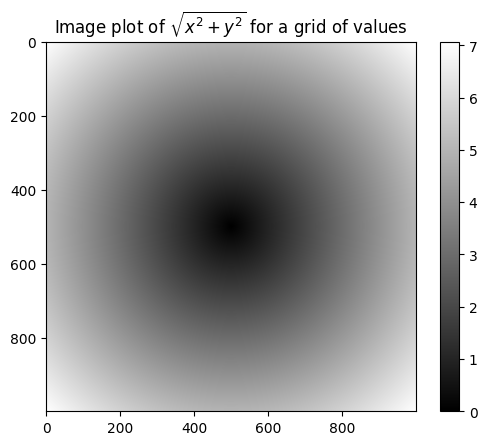

In [99]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


#  Expressing Conditional Logic as Array Operations

**numpy.where funksiyası**, Python-da istifadə olunan ternary expression olan
x if condition else y ifadəsinin vectorized versiyasıdır.

Təsəvvür edək ki, bizdə bir boolean array və iki value array var:

In [100]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])


np.where daxil olan arqumentlər scalar da ola bilər

Məsələn, random olaraq yaradılmış matrix-də müsbət ədədləri 2, mənfi ədədləri isə −2 ilə əvəz etmək istəsək:

In [102]:
arr = np.random.randn(4, 4)


In [103]:
arr > 0


array([[ True,  True, False, False],
       [False, False,  True, False],
       [ True, False, False,  True],
       [ True,  True,  True, False]])

In [104]:
np.where(arr > 0, 2, -2)


array([[ 2,  2, -2, -2],
       [-2, -2,  2, -2],
       [ 2, -2, -2,  2],
       [ 2,  2,  2, -2]])

In [105]:
np.where(arr > 0, 2, arr)


array([[ 2.        ,  2.        , -4.09783801, -0.60728651],
       [-2.23278524, -0.91622791,  2.        , -0.31406601],
       [ 2.        , -0.25223406, -0.70360665,  2.        ],
       [ 2.        ,  2.        ,  2.        , -0.6416616 ]])

#  Mathematical and Statistical Methods

**Mathematical və Statistical Methods**

NumPy-də array üzərində statistical aggregation funksiyaları mövcuddur:

* sum

* mean

* std
ve s.

Bu funksiyaları həm array metodları, həm də top-level NumPy funksiyaları kimi çağırmaq olar.

Nümunə üçün normal bölünmüş random data yaradaq:

In [106]:
arr = np.random.randn(5, 4)


In [107]:
arr.mean()
np.mean(arr)


np.float64(0.2550392808720638)

In [108]:
arr.sum()


np.float64(5.100785617441276)

**axis arqumenti ilə statistikalar**

axis göstərildikdə, uyğun ölçü üzrə statistik nəticə qaytarır:

* axis=1 → sətirlər üzrə (hər sətrin mean-i)

* axis=0 → sütunlar üzrə (hər sütunun sum-u)

In [109]:
arr.mean(axis=1)
arr.sum(axis=0)


array([-1.22384416,  0.56286116,  1.569902  ,  4.19186662])

**Accumulation Functions (cumsum və cumprod)**

Bu funksiyalar aggregrate etmir, sadece partial result arrays qaytarır.

In [110]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()


array([ 0,  1,  3,  6, 10, 15, 21, 28])

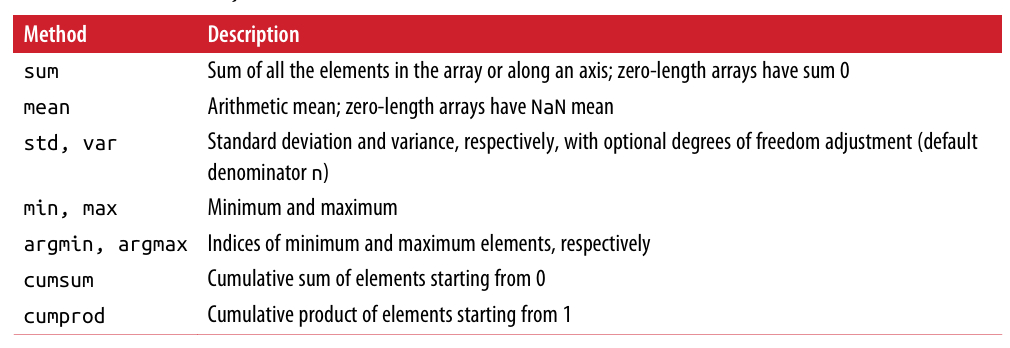

# Methods for Boolean Arrays

**Boolean array-lar** üçün tətbiq olunan metodlarda True → 1, False → 0 kimi qəbul edilir. Buna görə sum çox vaxt boolean array-də neçə dənə True olduğunu hesablamaq üçün istifadə olunur:

In [111]:
arr = np.random.randn(100)
(arr > 0).sum()  # Number of positive values



np.int64(54)

Boolean array-lar üçün xüsusilə faydalı olan iki əlavə metod da vardır: any və all.

* any – array-də ən azı bir dənə True olub-olmadığını yoxlayır.

* all – array-də bütün elementlərin True olub-olmadığını yoxlayır.

In [112]:
bools = np.array([False, False, True, False])
bools.any()

bools.all()



np.False_

Bu metodlar non-boolean arrays üçün də işləyir — yəni array-dəki 0 olmayan bütün elementlər True kimi qiymətləndirilir.

# Sorting

Python-un daxili list tipinə bənzər şəkildə, NumPy array-larını in-place sıralamaq üçün sort metodundan istifadə etmək olar:

In [113]:
arr = np.random.randn(6)
arr


arr.sort()
arr



array([-1.5334624 , -0.24603094,  0.36175625,  1.02116843,  1.24914339,
        1.35377649])

Multidimensional array-larda hər bir birölçülü seqmenti axis boyunca in-place sıralamaq üçün axis nömrəsini sort metoduna ötürmək kifayətdir:

In [114]:
arr = np.random.randn(5, 3)
arr


arr.sort(1)
arr




array([[-1.17640131, -0.40991572,  0.94367414],
       [-1.27722234, -0.76474313,  1.11199907],
       [-1.41801331, -0.86534259, -0.71918628],
       [-1.51509478, -0.01765792,  0.54445523],
       [ 0.21756548,  0.23589302,  2.55575629]])

np.sort isə array-in surətini qaytarır, orijinal array-i dəyişdirmir:

In [115]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]  # 5% kvantil



np.float64(-1.66218789577626)

#  Unique and Other Set Logic

NumPy, birölçülü ndarray-lar üçün bir neçə əsas kümə əməliyyatı təmin edir.
Ən çox istifadə olunanlardan biri np.unique funksiyasıdır. Bu funksiya array-dəki təkrarlanmayan və sıralanmış unikal dəyərləri qaytarır:

In [116]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)



array([1, 2, 3, 4])

Başqa bir funksiya olan np.in1d, bir array-dəki dəyərlərin başqa array-də olub-olmadığını yoxlayır və boolean array qaytarır:

In [118]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])


/tmp/ipython-input-1741557438.py:2: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(values, [2, 3, 6])


array([ True, False, False,  True,  True, False,  True])

Burada, np.in1d array-dəki hər bir elementin [2, 3, 6] siyahısında olub olmadığını yoxlayır və uyğun olaraq True və ya False qaytarır.

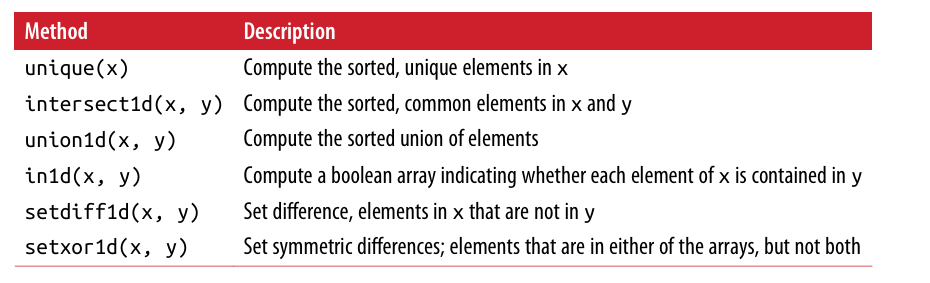

# File Input and Output with Arrays

NumPy məlumatları diskə text və ya binary formatında yazıb oxuya bilir.
Bu hissədə yalnız NumPy-nin built-in binary formatı müzakirə olunur, çünki əksər istifadəçilər text və ya cədvəl formatlı məlumatlar üçün pandas və digər alətləri üstün tuturlar (bax Chapter 6).

**np.save və np.load**

np.save və np.load diskdə array məlumatlarını səmərəli yazmaq və oxumaq üçün əsas funksiyalardır.

Arrays default olaraq sıxılmamış raw binary formatda .npy uzantısı ilə saxlanılır:

In [119]:
arr = np.arange(10)
np.save('some_array', arr)


Fayl adı .npy ilə bitmirsə, bu uzantı avtomatik əlavə olunur.

Diskdən array-i np.load ilə oxumaq olar:

In [120]:
np.load('some_array.npy')


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Birdən çox array saxlamaq

np.savez ilə bir neçə array-i uncompressed archive kimi saxlayıb, keyword arguments kimi ötürmək olar:

In [121]:
np.savez('array_archive.npz', a=arr, b=arr)


# Linear Algebra

In [123]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])


In [124]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [125]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [126]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [127]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [128]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [130]:
x @ np.ones(3)

array([ 6., 15.])

In [131]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[ 2.39017081, -2.14136708, -2.76540049,  3.87417331,  0.5309481 ],
       [-2.14136708,  3.1132667 ,  2.06871732, -4.10363599, -0.8989726 ],
       [-2.76540049,  2.06871732,  3.8829377 , -4.32098107, -0.20546311],
       [ 3.87417331, -4.10363599, -4.32098107,  6.8668066 ,  1.11335392],
       [ 0.5309481 , -0.8989726 , -0.20546311,  1.11335392,  0.71626168]])

In [133]:
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[-10.78872095,   1.36317993,  -3.21080597,   4.65313471,
          1.71917698],
       [  0.        ,  -3.13386557,  -2.43716383,  -3.65614089,
          1.03342209],
       [  0.        ,   0.        ,  -1.91355759,  -1.75065457,
          3.12369743],
       [  0.        ,   0.        ,   0.        ,  -0.22292921,
          1.1650436 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.58875905]])

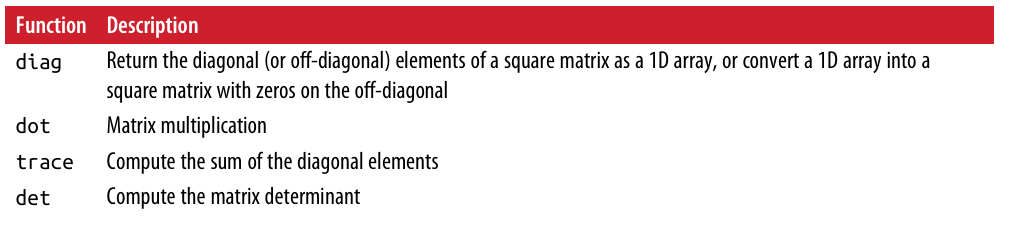

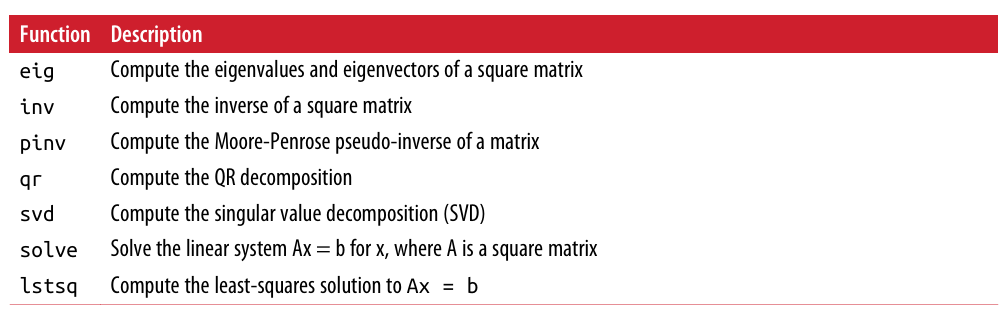